# Human Activity Recognition

## Obtain the input files

In [1]:
# Imports
import os
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

# Loading the data
raw_data = load_files(os.getcwd() + r'/Data3', shuffle=False)
files = raw_data['filenames']
targets = raw_data['target']

train_files, test_files, train_targets, test_targets = train_test_split(files, targets, test_size=20, random_state=191)

valid_files = train_files[65:]
valid_targets = train_targets[65:]

train_files = train_files[:65]
train_targets = train_targets[:65]

# Generic details about the data
print('Total number of videos:', len(files))
print('\nNumber of videos in training data:', train_files.shape[0])
print('Number of videos in validation data:', valid_files.shape[0])
print('Number of videos in test data:', test_files.shape[0])

('Total number of videos:', 107)
('\nNumber of videos in training data:', 65)
('Number of videos in validation data:', 22)
('Number of videos in test data:', 20)


### Description of the class labels

In [2]:
print('The categorical labels are converted into integers.\nFollowing is the mapping - \n')
for label in zip(range(6), raw_data['target_names']):
    print(label)
    

The categorical labels are converted into integers.
Following is the mapping - 

(0, 'handshake2')
(1, 'hug2')
(2, 'kick2')
(3, 'point2')
(4, 'punch2')
(5, 'push2')


### Each video file is associated with its class label

In [3]:
# Displaying the first 5 videos (paths) in the training data along with their labels
# (path of video, class label)
for pair in zip(train_files[:5], train_targets[:5]):
    print(pair)

('/home/geet/project/implementation/CNN/Data3/hug2/9_12_1.avi', 1)
('/home/geet/project/implementation/CNN/Data3/hug2/47_8_1.avi', 1)
('/home/geet/project/implementation/CNN/Data3/hug2/24_15_1.avi', 1)
('/home/geet/project/implementation/CNN/Data3/push2/52_19_5.avi', 5)
('/home/geet/project/implementation/CNN/Data3/punch2/43_18_4.avi', 4)


('\nShape of the sample data:', (139, 268, 248, 3))


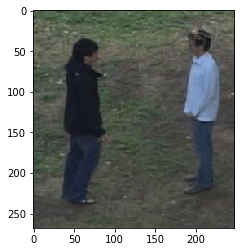

In [4]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


# The path of a sample video in the training data
sample_files = train_files[:1]

# An object of the class 'Videos'
sample = skvideo.io.vread(sample_files[0]);

print('\nShape of the sample data:', sample.shape)

# Displaying a frame from the sample video
plt.imshow(sample[10])

In [5]:
sec=3
frames_needed=21

In [6]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
import cv2
def read_video_bgsub(path):
       
        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(3,3))
        fgbg = cv2.createBackgroundSubtractorMOG2()
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            #print type(temp_image)
            fgmask = fgbg.apply(frame)
            fgmask = cv2.morphologyEx(fgmask, cv2.MORPH_OPEN, kernel)
            
            fgmaskimg = Image.fromarray(fgmask)
            
            #print type(fgmask)
            frame = image.img_to_array(
                        fgmaskimg.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

/home/geet/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [7]:
import numpy as np
from skvideo.io import FFmpegReader, ffprobe
from skvideo.utils import rgb2gray
from PIL import Image
from keras.preprocessing import image
from tqdm import tqdm
from keras.utils import to_categorical
def read_video(path):
      

        cap = FFmpegReader(filename=path)
        list_of_frames = []
        fps = int(cap.inputfps)                  # Frame Rate
        
        frames_from_sec=int(frames_needed/sec)
        
        frame_alternate=int(fps/frames_from_sec)
        count = 0;
        
        for index, frame in enumerate(cap.nextFrame()):
            temp_image = image.array_to_img(frame)
            frame = image.img_to_array(
                        temp_image.resize(
                            (20, 20),
                            Image.ANTIALIAS)).astype('uint8')
            if index%frame_alternate == 0:
                if count < frames_needed:
                    list_of_frames.append(frame);
                    count= count+1;

        temp_video = np.stack(list_of_frames)
        
        ##Extract Specific Frames
        
        total_frames = temp_video.shape[0]
        
        
        
        cap.close()

        temp_video = rgb2gray(temp_video)
                
        return np.expand_dims(temp_video, axis=0)

In [8]:
def read_videos(paths):
      
        list_of_videos = []
        list_of_videos = [
            read_video(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))


In [9]:
def read_videos_bgsub(paths):
       
        list_of_videos = []
        list_of_videos = [
            read_video_bgsub(path) for path in tqdm(paths)
        ]

        #print("shape1:", list_of_videos[:].shape)
        videos = np.vstack(list_of_videos)

        #base = self.normalize_pixels[0]
        #r = self.normalize_pixels[1] - base
        min_ = np.min(videos, axis=(1, 2, 3), keepdims=True)
        max_ = np.max(videos, axis=(1, 2, 3), keepdims=True)
        #return ((videos.astype('float32') - min_) / (max_ - min_)) * r + base
        return ((videos.astype('float32') - min_) / (max_ - min_))

In [10]:
# Reading training videos and one-hot encoding the training labels
X_train = read_videos(train_files)
y_train = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 65/65 [00:17<00:00,  3.81it/s]


('Shape of training data:', (65, 21, 20, 20, 1))
('Shape of training labels:', (65, 6))


In [11]:
# Reading validation videos and one-hot encoding the validation labels
X_valid = read_videos(valid_files)

y_valid = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████| 22/22 [00:06<00:00,  3.29it/s]

('Shape of validation data:', (22, 21, 20, 20, 1))
('Shape of validation labels:', (22, 6))


In [12]:
# Reading testing videos and one-hot encoding the testing labels
X_test = read_videos(test_files)
y_test = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 20/20 [00:04<00:00,  4.04it/s]

('Shape of testing data:', (20, 21, 20, 20, 1))
('Shape of testing labels:', (20, 6))


In [13]:
X_train_bgsub = read_videos_bgsub(train_files)
y_train_bgsub = to_categorical(train_targets, num_classes=6)
print('Shape of training data:', X_train.shape)
print('Shape of training labels:', y_train.shape)

100%|██████████| 65/65 [00:41<00:00,  1.58it/s]

('Shape of training data:', (65, 21, 20, 20, 1))
('Shape of training labels:', (65, 6))


In [14]:
X_test_bgsub = read_videos_bgsub(test_files)
y_test_bgsub = to_categorical(test_targets, num_classes=6)
print('Shape of testing data:', X_test.shape)
print('Shape of testing labels:', y_test.shape)

100%|██████████| 20/20 [00:11<00:00,  1.74it/s]

('Shape of testing data:', (20, 21, 20, 20, 1))
('Shape of testing labels:', (20, 6))


In [15]:
X_valid_bgsub = read_videos_bgsub(valid_files)
y_valid_bgsub = to_categorical(valid_targets, num_classes=6)
print('Shape of validation data:', X_valid.shape)
print('Shape of validation labels:', y_valid.shape)

100%|██████████| 22/22 [00:15<00:00,  1.42it/s]

('Shape of validation data:', (22, 21, 20, 20, 1))
('Shape of validation labels:', (22, 6))


('Class of 1st video:', 1)


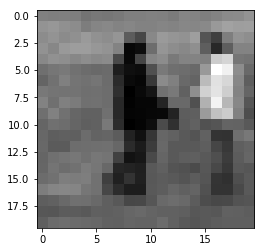

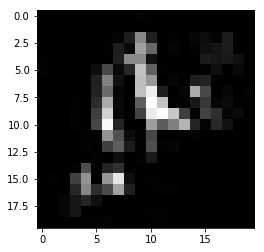

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

# After pre-processing

# Displaying the 10th frame of the first processed video from the training data
print("Class of 1st video:",y_train[0].argmax());
plt.imshow(np.squeeze(X_train[0][10], axis=2), cmap='gray')
plt.show()
plt.imshow(np.squeeze(X_train_bgsub[0][10], axis=2), cmap='gray')

# Model 1 without BG Subtraction

In [17]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1 = Sequential()

# Adding Alternate convolutional and pooling layers
model1.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1.add(GlobalAveragePooling3D())

model1.add(Dense(32, activation='relu'))

model1.add(Dense(6, activation='softmax'))

model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 4, 18, 18, 16)     1456      
_________________________________________________________________
max_pooling3d_1 (MaxPooling3 (None, 4, 9, 9, 16)       0         
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 4, 9, 9, 64)       46144     
_________________________________________________________________
max_pooling3d_2 (MaxPooling3 (None, 4, 5, 5, 64)       0         
_________________________________________________________________
global_average_pooling3d_1 ( (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 198       
Total para

### Training Model - 1

In [18]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint1 = ModelCheckpoint(filepath='US_Model_1.weights.best.hdf5', save_best_only=True, verbose=1)


history1 = model1.fit(X_train, y_train, batch_size=15, epochs=80, validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint1])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 65 samples, validate on 22 samples
Epoch 1/80
 - 8s - loss: 1.7997 - acc: 0.1231 - val_loss: 1.7916 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.79157, saving model to US_Model_1.weights.best.hdf5
Epoch 2/80
 - 7s - loss: 1.7869 - acc: 0.2308 - val_loss: 1.8024 - val_acc: 0.1818

Epoch 00002: val_loss did not improve
Epoch 3/80
 - 7s - loss: 1.7821 - acc: 0.2308 - val_loss: 1.8185 - val_acc: 0.1818

Epoch 00003: val_loss did not improve
Epoch 4/80
 - 7s - loss: 1.7703 - acc: 0.2308 - val_loss: 1.8387 - val_acc: 0.1818

Epoch 00004: val_loss did not improve
Epoch 5/80
 - 7s - loss: 1.7661 - acc: 0.2308 - val_loss: 1.8855 - val_acc: 0.1818

Epoch 00005: val_loss did not improve
Epoch 6/80
 - 7s - loss: 1.7724 - acc: 0.2308 - val_loss: 1.8942 - val_acc: 0.1818

Epoch 00006: val_loss did not improve
Epoch 7/80
 - 7s - loss: 1.7625 - acc: 0.2308 - val_loss: 1.8632 - val_acc: 0.1818

Epoch 00007: val_loss did not improve
Epoch 8/80
 - 7s - loss: 1.7579 - acc: 0.23


Epoch 00061: val_loss did not improve
Epoch 62/80
 - 7s - loss: 1.4366 - acc: 0.4154 - val_loss: 1.5987 - val_acc: 0.3636

Epoch 00062: val_loss did not improve
Epoch 63/80
 - 7s - loss: 1.4707 - acc: 0.3846 - val_loss: 1.5908 - val_acc: 0.3636

Epoch 00063: val_loss did not improve
Epoch 64/80
 - 7s - loss: 1.3909 - acc: 0.4154 - val_loss: 1.4384 - val_acc: 0.4545

Epoch 00064: val_loss did not improve
Epoch 65/80
 - 7s - loss: 1.3223 - acc: 0.5846 - val_loss: 1.3789 - val_acc: 0.5455

Epoch 00065: val_loss did not improve
Epoch 66/80
 - 7s - loss: 1.2789 - acc: 0.5538 - val_loss: 1.3454 - val_acc: 0.4091

Epoch 00066: val_loss did not improve
Epoch 67/80
 - 7s - loss: 1.3374 - acc: 0.4154 - val_loss: 1.3031 - val_acc: 0.5000

Epoch 00067: val_loss did not improve
Epoch 68/80
 - 7s - loss: 1.3197 - acc: 0.4615 - val_loss: 1.2745 - val_acc: 0.5455

Epoch 00068: val_loss improved from 1.29996 to 1.27453, saving model to US_Model_1.weights.best.hdf5
Epoch 69/80
 - 7s - loss: 1.2365 - ac

### Evaluating Model - 1

In [19]:
# Loading the model that performed the best on the validation set
model1.load_weights('US_Model_1.weights.best.hdf5')

# Testing the model on the Test data
(loss1, accuracy1) = model1.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1 * 100))

Accuracy on test data: 45.00%


## Model - 1 Performance



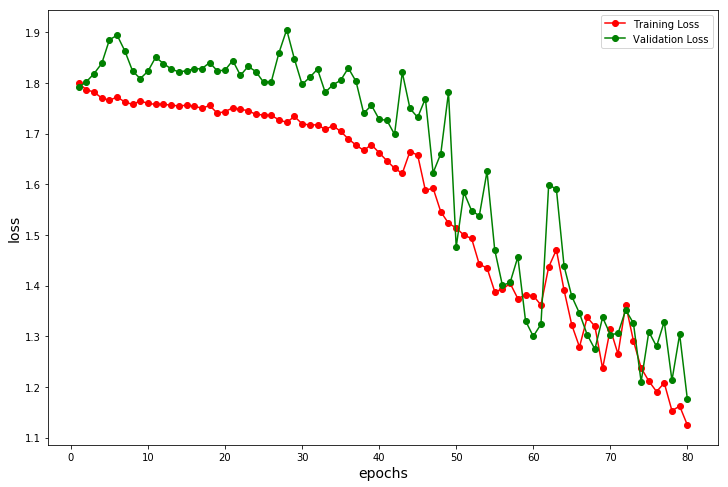

In [20]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss1 = history1.history['loss']                          # Loss on the training data
val_loss1 = history1.history['val_loss']                  # Loss on the validation data
epochs = range(1,81)

plt.plot(epochs, loss1, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

In [21]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.GnBu):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.subplots(1, 1, figsize=(8, 8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
#cnf_matrix = confusion_matrix(y_test, y_pred)
#np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names,
#                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
#plt.figure()
#plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                      title='Normalized confusion matrix')

#plt.show()


Normalized confusion matrix


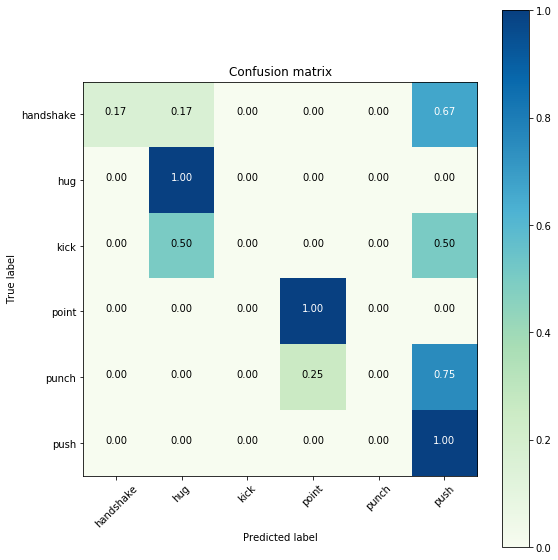

In [22]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1.predict_classes(X_test);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['handshake','hug','kick','point','punch','push'], 
                                              normalize=True)


# Model 1, With BG Subtraction

In [23]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense

# Using the Sequential Model
model1_bg = Sequential()


# Adding Alternate convolutional and pooling layers
model1_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(3, 1, 1), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model1_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
model1_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model1_bg.add(GlobalAveragePooling3D())

model1_bg.add(Dense(32, activation='relu'))

model1_bg.add(Dense(6, activation='softmax'))

model1_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_3 (Conv3D)            (None, 4, 18, 18, 16)     1456      
_________________________________________________________________
max_pooling3d_3 (MaxPooling3 (None, 4, 9, 9, 16)       0         
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 4, 9, 9, 64)       46144     
_________________________________________________________________
max_pooling3d_4 (MaxPooling3 (None, 4, 5, 5, 64)       0         
_________________________________________________________________
global_average_pooling3d_2 ( (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 6)                 198       
Total para

In [24]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model1_bg.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint_bg = ModelCheckpoint(filepath='US_Model_1_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history1_bg = model1_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=80, validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint_bg])
#history = model.fit(X_train, y_train, batch_size=16, epochs=40, verbose=2, callbacks=[checkpoint])

Train on 65 samples, validate on 22 samples
Epoch 1/80
65/65 [==============================] - 7s 110ms/step - loss: 1.7968 - acc: 0.1846 - val_loss: 1.8201 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.82006, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 2/80
65/65 [==============================] - 7s 106ms/step - loss: 1.7730 - acc: 0.2308 - val_loss: 1.8209 - val_acc: 0.1818

Epoch 00002: val_loss did not improve
Epoch 3/80
65/65 [==============================] - 7s 106ms/step - loss: 1.7642 - acc: 0.2308 - val_loss: 1.8498 - val_acc: 0.1818

Epoch 00003: val_loss did not improve
Epoch 4/80
65/65 [==============================] - 7s 106ms/step - loss: 1.7442 - acc: 0.2308 - val_loss: 1.8766 - val_acc: 0.1818

Epoch 00004: val_loss did not improve
Epoch 5/80
65/65 [==============================] - 7s 106ms/step - loss: 1.7298 - acc: 0.2308 - val_loss: 1.9004 - val_acc: 0.1818

Epoch 00005: val_loss did not improve
Epoch 6/80
65/65 [=====================


Epoch 00041: val_loss improved from 1.10629 to 1.08870, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 42/80
65/65 [==============================] - 7s 107ms/step - loss: 1.0107 - acc: 0.6154 - val_loss: 1.2098 - val_acc: 0.5000

Epoch 00042: val_loss did not improve
Epoch 43/80
65/65 [==============================] - 7s 107ms/step - loss: 0.9337 - acc: 0.6308 - val_loss: 1.1901 - val_acc: 0.5455

Epoch 00043: val_loss did not improve
Epoch 44/80
65/65 [==============================] - 7s 106ms/step - loss: 0.9216 - acc: 0.6769 - val_loss: 1.0488 - val_acc: 0.5909

Epoch 00044: val_loss improved from 1.08870 to 1.04876, saving model to US_Model_1_bg.weights.best.hdf5
Epoch 45/80
65/65 [==============================] - 7s 106ms/step - loss: 0.9002 - acc: 0.6615 - val_loss: 1.0977 - val_acc: 0.5909

Epoch 00045: val_loss did not improve
Epoch 46/80
65/65 [==============================] - 7s 107ms/step - loss: 0.8813 - acc: 0.6923 - val_loss: 1.1194 - val_acc: 0.5455

Epoch 0

In [25]:
model1_bg.load_weights('US_Model_1_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss1_bg, accuracy1_bg) = model1_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy1_bg * 100))

Accuracy on test data: 70.00%


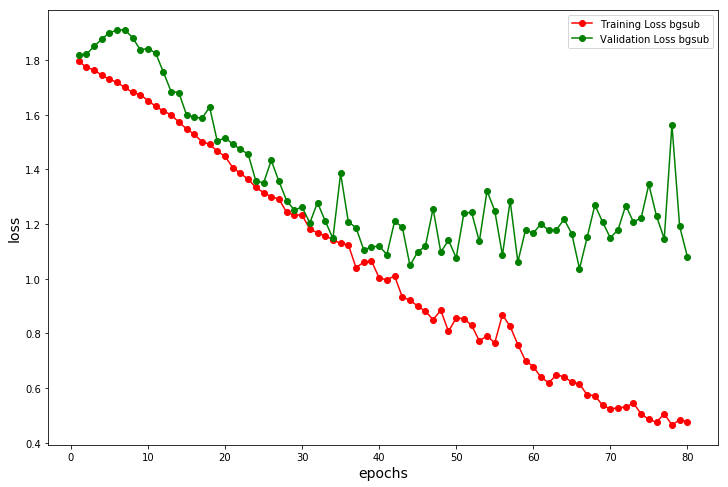

In [26]:
plt.figure(figsize=(12, 8))

loss1_bg = history1_bg.history['loss']                          # Loss on the training data
val_loss1_bg = history1_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1,81)

plt.plot(epochs, loss1_bg, 'ro-', label='Training Loss bgsub')
plt.plot(epochs, val_loss1_bg, 'go-', label = 'Validation Loss bgsub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


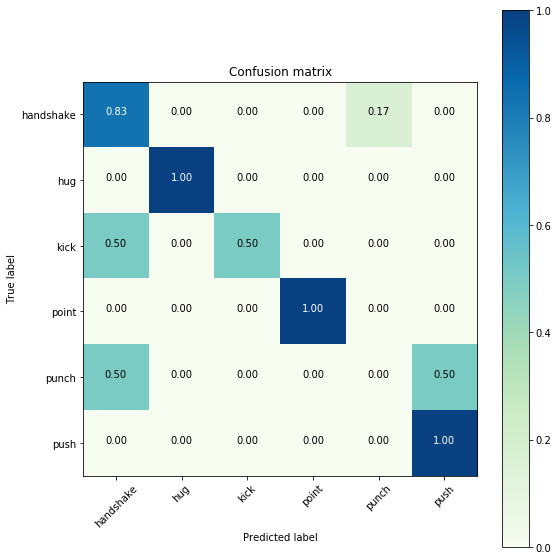

In [27]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions = model1_bg.predict_classes(X_test_bgsub);
y_pred=to_categorical(y_predictions, num_classes=6).argmax(axis=1);
y_test_cm = y_test_bgsub.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['handshake','hug','kick','point','punch','push'], 
                                              normalize=True)


## Comparision of Model1 with BG-sub and without BG-sub

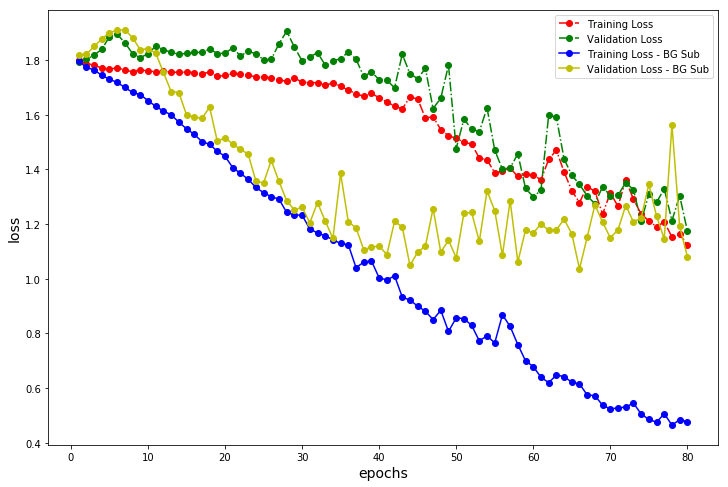

In [28]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss1, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss1, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss1_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss1_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

## Model - 2


In [29]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2 = Sequential()


model2.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2.add(GlobalAveragePooling3D())

model2.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2.add(Dense(6, activation='softmax'))

model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_5 (Conv3D)            (None, 3, 9, 9, 16)       1456      
_________________________________________________________________
max_pooling3d_5 (MaxPooling3 (None, 3, 5, 5, 16)       0         
_________________________________________________________________
conv3d_6 (Conv3D)            (None, 1, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_6 (MaxPooling3 (None, 1, 3, 3, 64)       0         
_________________________________________________________________
conv3d_7 (Conv3D)            (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_7 (MaxPooling3 (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_3 ( (None, 256)               0         
__________

### Training Model - 2


In [30]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2 = ModelCheckpoint(filepath='US_Model_2.weights.best.hdf5', save_best_only=True, verbose=1)

history2 = model2.fit(X_train, y_train, batch_size=15, epochs=80, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint2])

Train on 65 samples, validate on 22 samples
Epoch 1/80
 - 6s - loss: 1.8111 - acc: 0.1692 - val_loss: 1.7862 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.78620, saving model to US_Model_2.weights.best.hdf5
Epoch 2/80
 - 6s - loss: 1.7697 - acc: 0.2154 - val_loss: 1.8114 - val_acc: 0.1818

Epoch 00002: val_loss did not improve
Epoch 3/80
 - 6s - loss: 1.7731 - acc: 0.2154 - val_loss: 1.8212 - val_acc: 0.1818

Epoch 00003: val_loss did not improve
Epoch 4/80
 - 6s - loss: 1.7644 - acc: 0.2154 - val_loss: 1.8716 - val_acc: 0.1818

Epoch 00004: val_loss did not improve
Epoch 5/80
 - 6s - loss: 1.7591 - acc: 0.2154 - val_loss: 1.8821 - val_acc: 0.1818

Epoch 00005: val_loss did not improve
Epoch 6/80
 - 6s - loss: 1.7583 - acc: 0.2308 - val_loss: 1.8702 - val_acc: 0.2273

Epoch 00006: val_loss did not improve
Epoch 7/80
 - 6s - loss: 1.7711 - acc: 0.2462 - val_loss: 1.8138 - val_acc: 0.1818

Epoch 00007: val_loss did not improve
Epoch 8/80
 - 6s - loss: 1.7590 - acc: 0.23

 - 6s - loss: 0.3446 - acc: 0.8923 - val_loss: 2.0428 - val_acc: 0.5000

Epoch 00065: val_loss did not improve
Epoch 66/80
 - 6s - loss: 0.3166 - acc: 0.9077 - val_loss: 2.0958 - val_acc: 0.5000

Epoch 00066: val_loss did not improve
Epoch 67/80
 - 6s - loss: 0.3012 - acc: 0.8769 - val_loss: 2.6250 - val_acc: 0.4091

Epoch 00067: val_loss did not improve
Epoch 68/80
 - 6s - loss: 0.2744 - acc: 0.9231 - val_loss: 1.9768 - val_acc: 0.5455

Epoch 00068: val_loss did not improve
Epoch 69/80
 - 6s - loss: 0.2466 - acc: 0.9385 - val_loss: 3.0834 - val_acc: 0.3182

Epoch 00069: val_loss did not improve
Epoch 70/80
 - 6s - loss: 0.2684 - acc: 0.8923 - val_loss: 2.1880 - val_acc: 0.5909

Epoch 00070: val_loss did not improve
Epoch 71/80
 - 6s - loss: 0.2283 - acc: 0.9846 - val_loss: 2.4881 - val_acc: 0.4545

Epoch 00071: val_loss did not improve
Epoch 72/80
 - 6s - loss: 0.2063 - acc: 0.9538 - val_loss: 1.9917 - val_acc: 0.5000

Epoch 00072: val_loss did not improve
Epoch 73/80
 - 6s - loss: 0.

### Evaluating Model - 2

Evaluating `Model-2` on the test data.

In [31]:
# Loading the model that performed the best on the validation set
model2.load_weights('US_Model_2.weights.best.hdf5')

# Testing the model on the Test data
(loss2, accuracy2) = model2.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2 * 100))

Accuracy on test data: 50.00%


## Model - 2 Performance



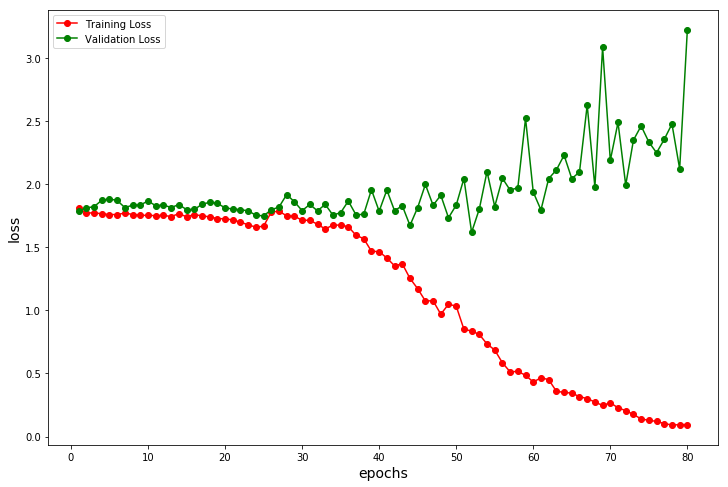

In [32]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2 = history2.history['loss']                          # Loss on the training data
val_loss2 = history2.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss2, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


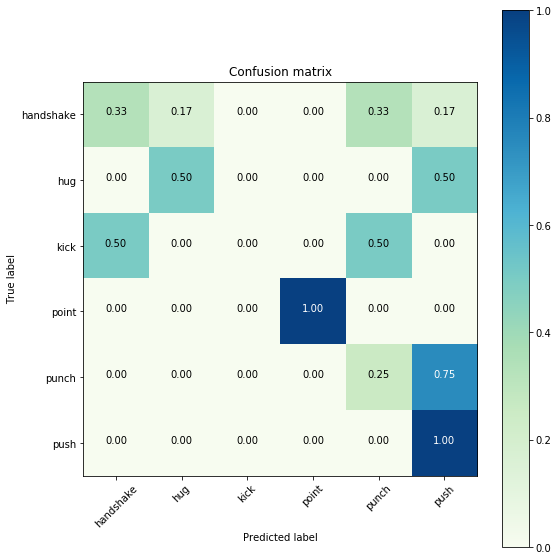

In [33]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2 = model2.predict_classes(X_test);
y_pred2=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['handshake','hug','kick','point','punch','push'], 
                                              normalize=True)


# Model 2 - With BG

In [34]:
# Imports
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model2_bg = Sequential()


model2_bg.add(Conv3D(filters=16, kernel_size=(10, 3, 3), strides=(5, 2, 2), padding='valid', activation='relu', 
                 input_shape=X_train.shape[1:]))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=64, kernel_size=(5, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))

model2_bg.add(Conv3D(filters=256, kernel_size=(3, 3, 3), strides=(3, 1, 1), padding='same', activation='relu'))
model2_bg.add(MaxPooling3D(pool_size=2, strides=(1, 2, 2), padding='same'))


model2_bg.add(GlobalAveragePooling3D())

model2_bg.add(Dense(32, activation='relu'))

#model2.add(Dropout(0.5))

model2_bg.add(Dense(6, activation='softmax'))

model2_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_8 (Conv3D)            (None, 3, 9, 9, 16)       1456      
_________________________________________________________________
max_pooling3d_8 (MaxPooling3 (None, 3, 5, 5, 16)       0         
_________________________________________________________________
conv3d_9 (Conv3D)            (None, 1, 5, 5, 64)       46144     
_________________________________________________________________
max_pooling3d_9 (MaxPooling3 (None, 1, 3, 3, 64)       0         
_________________________________________________________________
conv3d_10 (Conv3D)           (None, 1, 3, 3, 256)      442624    
_________________________________________________________________
max_pooling3d_10 (MaxPooling (None, 1, 2, 2, 256)      0         
_________________________________________________________________
global_average_pooling3d_4 ( (None, 256)               0         
__________

In [35]:
# Imports
from keras.callbacks import ModelCheckpoint
from keras import optimizers

# Compiling the model
#sgd = optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
#adam=optimizers.Adam(lr=0.01, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
#model2.compile(loss='mean_squared_error', optimizer=sgd, metrics=['accuracy'])

#model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model2_bg.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])
# Saving the model that performed the best on the validation set
checkpoint2_bg = ModelCheckpoint(filepath='US_Model_2_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history2_bg = model2_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=80, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint2_bg])

Train on 65 samples, validate on 22 samples
Epoch 1/80
65/65 [==============================] - 6s 93ms/step - loss: 1.7782 - acc: 0.1846 - val_loss: 1.8325 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.83246, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 2/80
65/65 [==============================] - 6s 88ms/step - loss: 1.7246 - acc: 0.2154 - val_loss: 1.8838 - val_acc: 0.1818

Epoch 00002: val_loss did not improve
Epoch 3/80
65/65 [==============================] - 6s 88ms/step - loss: 1.7060 - acc: 0.2154 - val_loss: 1.7486 - val_acc: 0.1818

Epoch 00003: val_loss improved from 1.83246 to 1.74857, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 4/80
65/65 [==============================] - 6s 88ms/step - loss: 1.6604 - acc: 0.3077 - val_loss: 1.7354 - val_acc: 0.4091

Epoch 00004: val_loss improved from 1.74857 to 1.73540, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 5/80
65/65 [==============================] - 6s 88ms/step - loss: 1.6305 - 


Epoch 00042: val_loss did not improve
Epoch 43/80
65/65 [==============================] - 6s 88ms/step - loss: 0.1024 - acc: 0.9846 - val_loss: 0.6011 - val_acc: 0.8636

Epoch 00043: val_loss improved from 0.67433 to 0.60108, saving model to US_Model_2_bg.weights.best.hdf5
Epoch 44/80
65/65 [==============================] - 6s 88ms/step - loss: 0.0514 - acc: 1.0000 - val_loss: 1.5030 - val_acc: 0.5455

Epoch 00044: val_loss did not improve
Epoch 45/80
65/65 [==============================] - 6s 88ms/step - loss: 0.0589 - acc: 1.0000 - val_loss: 1.2991 - val_acc: 0.6364

Epoch 00045: val_loss did not improve
Epoch 46/80
65/65 [==============================] - 6s 88ms/step - loss: 0.0409 - acc: 1.0000 - val_loss: 0.7192 - val_acc: 0.7727

Epoch 00046: val_loss did not improve
Epoch 47/80
65/65 [==============================] - 6s 88ms/step - loss: 0.0400 - acc: 1.0000 - val_loss: 1.0710 - val_acc: 0.6364

Epoch 00047: val_loss did not improve
Epoch 48/80
65/65 [=====================

In [36]:
# Loading the model that performed the best on the validation set
model2_bg.load_weights('US_Model_2_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss2_bg, accuracy2_bg) = model2_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy2_bg * 100))

Accuracy on test data: 75.00%


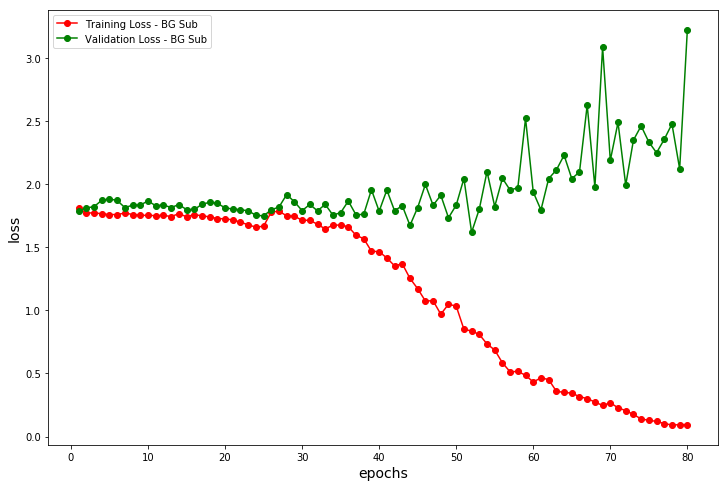

In [37]:
# Making the plot larger
plt.figure(figsize=(12, 8))

loss2_bg = history2_bg.history['loss']                          # Loss on the training data
val_loss2_bg = history2_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss2, 'ro-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2, 'go-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


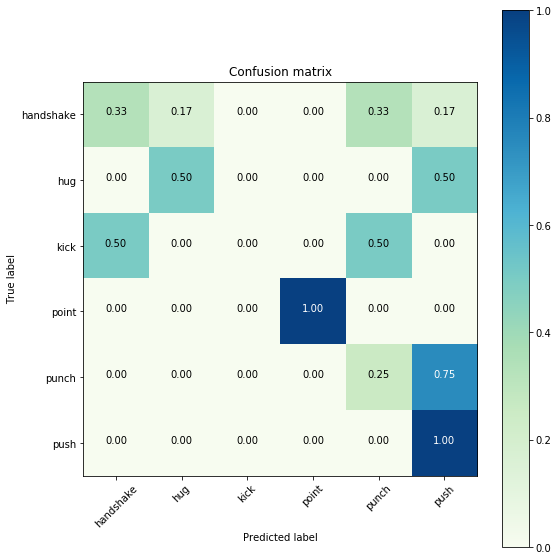

In [38]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions2_bg = model2_bg.predict_classes(X_test_bgsub);
y_pred2_bg=to_categorical(y_predictions2, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions[:10]
#print y_test[:10]
model_cnf_matrix = confusion_matrix(y_test_cm,y_pred2_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix, 
                                              classes=['handshake','hug','kick','point','punch','push'], 
                                              normalize=True)


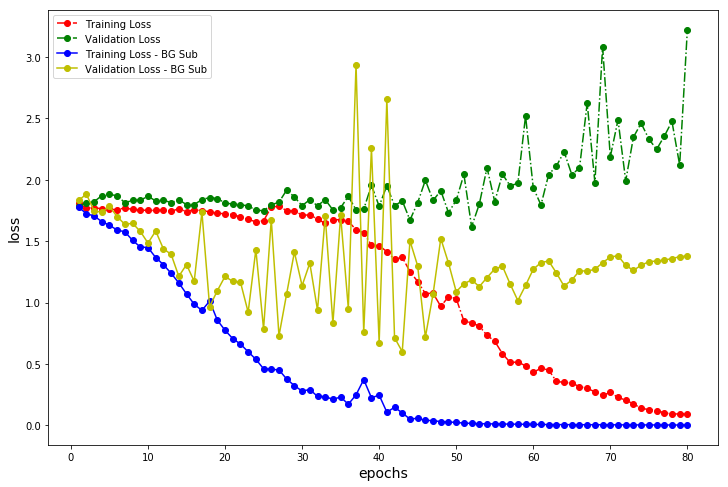

In [39]:
plt.figure(figsize=(12, 8))
plt.plot(epochs, loss2, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss2, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss2_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss2_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

# The model that worked

In [40]:
# from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3 = Sequential()

# Adding Alternate convolutional and pooling layers
model3.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3.add(GlobalAveragePooling3D())

# Hidden layer
model3.add(Dense(32, activation='relu'))

# Dropout Layer
model3.add(Dropout(0.5))

# Output layer
model3.add(Dense(6, activation='softmax'))

model3.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_11 (Conv3D)           (None, 21, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_11 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_12 (Conv3D)           (None, 10, 8, 8, 64)      18496     
_________________________________________________________________
max_pooling3d_12 (MaxPooling (None, 5, 4, 4, 64)       0         
_________________________________________________________________
conv3d_13 (Conv3D)           (None, 4, 2, 2, 256)      295168    
_________________________________________________________________
max_pooling3d_13 (MaxPooling (None, 2, 1, 1, 256)      0         
_________________________________________________________________
global_average_pooling3d_5 ( (None, 256)               0         
__________

In [41]:
# Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3 = ModelCheckpoint(filepath='US_Model_3.weights.best.hdf5', save_best_only=True, verbose=1)


history3 = model3.fit(X_train, y_train, batch_size=15, epochs=80, 
                    validation_data=(X_valid, y_valid), verbose=2, callbacks=[checkpoint3])

Train on 65 samples, validate on 22 samples
Epoch 1/80
 - 9s - loss: 1.8007 - acc: 0.1077 - val_loss: 1.7741 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.77412, saving model to US_Model_3.weights.best.hdf5
Epoch 2/80
 - 9s - loss: 1.8243 - acc: 0.2308 - val_loss: 1.7866 - val_acc: 0.1818

Epoch 00002: val_loss did not improve
Epoch 3/80
 - 9s - loss: 1.7907 - acc: 0.2462 - val_loss: 1.7822 - val_acc: 0.1818

Epoch 00003: val_loss did not improve
Epoch 4/80
 - 9s - loss: 1.7896 - acc: 0.1231 - val_loss: 1.7879 - val_acc: 0.1818

Epoch 00004: val_loss did not improve
Epoch 5/80
 - 9s - loss: 1.7898 - acc: 0.2154 - val_loss: 1.7887 - val_acc: 0.1818

Epoch 00005: val_loss did not improve
Epoch 6/80
 - 9s - loss: 1.7873 - acc: 0.2000 - val_loss: 1.7899 - val_acc: 0.1818

Epoch 00006: val_loss did not improve
Epoch 7/80
 - 9s - loss: 1.7843 - acc: 0.2308 - val_loss: 1.7873 - val_acc: 0.1818

Epoch 00007: val_loss did not improve
Epoch 8/80
 - 9s - loss: 1.7446 - acc: 0.23


Epoch 00060: val_loss did not improve
Epoch 61/80
 - 9s - loss: 1.0241 - acc: 0.5385 - val_loss: 2.0283 - val_acc: 0.3182

Epoch 00061: val_loss did not improve
Epoch 62/80
 - 9s - loss: 0.9417 - acc: 0.6000 - val_loss: 1.5215 - val_acc: 0.5455

Epoch 00062: val_loss did not improve
Epoch 63/80
 - 9s - loss: 0.9888 - acc: 0.6615 - val_loss: 1.0952 - val_acc: 0.6364

Epoch 00063: val_loss improved from 1.14771 to 1.09517, saving model to US_Model_3.weights.best.hdf5
Epoch 64/80
 - 9s - loss: 0.9805 - acc: 0.6000 - val_loss: 1.2477 - val_acc: 0.5909

Epoch 00064: val_loss did not improve
Epoch 65/80
 - 9s - loss: 0.8239 - acc: 0.6154 - val_loss: 1.1463 - val_acc: 0.5455

Epoch 00065: val_loss did not improve
Epoch 66/80
 - 9s - loss: 0.7514 - acc: 0.6923 - val_loss: 1.2024 - val_acc: 0.6364

Epoch 00066: val_loss did not improve
Epoch 67/80
 - 9s - loss: 0.7792 - acc: 0.6308 - val_loss: 1.5610 - val_acc: 0.5909

Epoch 00067: val_loss did not improve
Epoch 68/80
 - 9s - loss: 0.8578 - ac

In [42]:
# Loading the model that performed the best on the validation set
model3.load_weights('US_Model_3.weights.best.hdf5')

# Testing the model on the Test data
(loss3, accuracy3) = model3.evaluate(X_test, y_test, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3 * 100))

Accuracy on test data: 60.00%


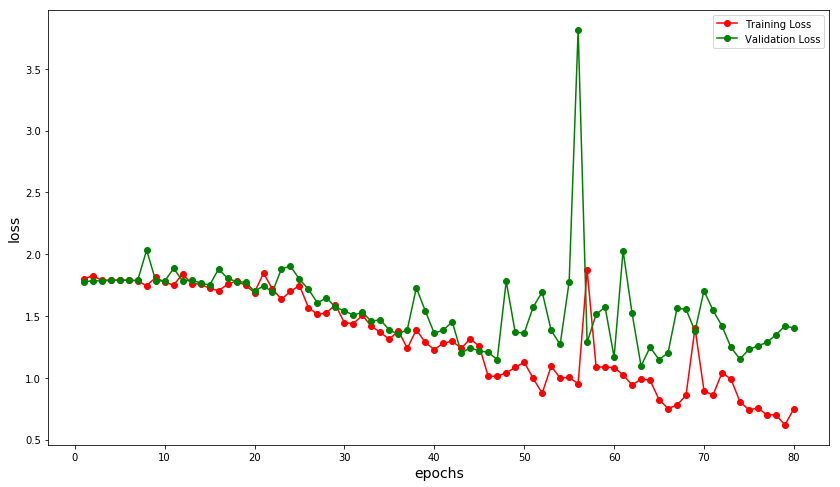

In [43]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3 = history3.history['loss']                          # Loss on the training data
val_loss3 = history3.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss3, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


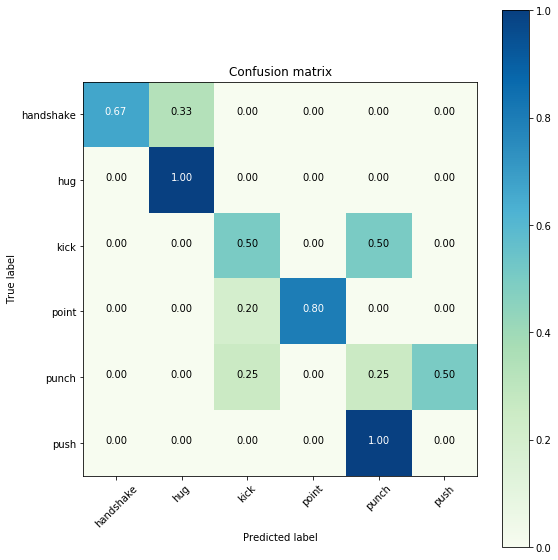

In [44]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3 = model3.predict_classes(X_test);
y_pred3=to_categorical(y_predictions3, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);

#print y_predictions3[:50]
#print y_test[:50]
model_cnf_matrix3 = confusion_matrix(y_test_cm,y_pred3);
#print(model_cnf_matrix3)
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3, 
                                              classes=['handshake','hug','kick','point','punch','push'], 
                                              normalize=True)


## Model3 BG Subtraction

In [45]:
from keras.models import Sequential
from keras.layers import Conv3D, MaxPooling3D, GlobalAveragePooling3D, BatchNormalization
from keras.layers.core import Dense, Dropout

# Using the Sequential Model
model3_bg = Sequential()

# Adding Alternate convolutional and pooling layers
model3_bg.add(Conv3D(filters=16, kernel_size=(5, 3, 3), strides=(1, 1, 1), padding='same', activation='relu', 
                 input_shape=X_train.shape[1:]))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=64, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

model3_bg.add(Conv3D(filters=256, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='valid', activation='relu'))
model3_bg.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

#model.add(Conv3D(filters=1024, kernel_size=(2, 3, 3), strides=(1, 1, 1), padding='same', activation='relu'))
#model.add(MaxPooling3D(pool_size=2, strides=(2, 2, 2), padding='same'))

# A global average pooling layer to get a 1-d vector
# The vector will have a depth (same as number of elements in the vector) of 1024
model3_bg.add(GlobalAveragePooling3D())

# Hidden layer
model3_bg.add(Dense(32, activation='relu'))

# Dropout Layer
model3_bg.add(Dropout(0.5))

# Output layer
model3_bg.add(Dense(6, activation='softmax'))

model3_bg.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_14 (Conv3D)           (None, 21, 20, 20, 16)    736       
_________________________________________________________________
max_pooling3d_14 (MaxPooling (None, 11, 10, 10, 16)    0         
_________________________________________________________________
conv3d_15 (Conv3D)           (None, 10, 8, 8, 64)      18496     
_________________________________________________________________
max_pooling3d_15 (MaxPooling (None, 5, 4, 4, 64)       0         
_________________________________________________________________
conv3d_16 (Conv3D)           (None, 4, 2, 2, 256)      295168    
_________________________________________________________________
max_pooling3d_16 (MaxPooling (None, 2, 1, 1, 256)      0         
_________________________________________________________________
global_average_pooling3d_6 ( (None, 256)               0         
__________

In [46]:
##### Imports
from keras.callbacks import ModelCheckpoint

# Compiling the model
model3_bg.compile(loss='categorical_crossentropy', optimizer='nadam', metrics=['accuracy'])

# Saving the model that performed the best on the validation set
checkpoint3_bg = ModelCheckpoint(filepath='US_Model_3_bg.weights.best.hdf5', save_best_only=True, verbose=1)


history3_bg = model3_bg.fit(X_train_bgsub, y_train_bgsub, batch_size=15, epochs=80, 
                    validation_data=(X_valid_bgsub, y_valid_bgsub), verbose=1, callbacks=[checkpoint3_bg])

Train on 65 samples, validate on 22 samples
Epoch 1/80
65/65 [==============================] - 9s 144ms/step - loss: 1.7938 - acc: 0.2000 - val_loss: 1.7771 - val_acc: 0.1818

Epoch 00001: val_loss improved from inf to 1.77710, saving model to US_Model_3_bg.weights.best.hdf5
Epoch 2/80
65/65 [==============================] - 9s 136ms/step - loss: 1.8634 - acc: 0.2000 - val_loss: 1.7754 - val_acc: 0.1818

Epoch 00002: val_loss improved from 1.77710 to 1.77537, saving model to US_Model_3_bg.weights.best.hdf5
Epoch 3/80
65/65 [==============================] - 9s 137ms/step - loss: 1.7477 - acc: 0.2154 - val_loss: 1.7831 - val_acc: 0.1818

Epoch 00003: val_loss did not improve
Epoch 4/80
65/65 [==============================] - 9s 137ms/step - loss: 1.7436 - acc: 0.2154 - val_loss: 1.8047 - val_acc: 0.1818

Epoch 00004: val_loss did not improve
Epoch 5/80
65/65 [==============================] - 9s 137ms/step - loss: 1.7818 - acc: 0.2154 - val_loss: 1.7321 - val_acc: 0.1818

Epoch 00005

In [47]:
# Loading the model that performed the best on the validation set
model3.load_weights('US_Model_3_bg.weights.best.hdf5')

# Testing the model on the Test data
(loss3_bg, accuracy3_bg) = model3_bg.evaluate(X_test_bgsub, y_test_bgsub, batch_size=15, verbose=0)

print('Accuracy on test data: {:.2f}%'.format(accuracy3_bg * 100))

Accuracy on test data: 70.00%


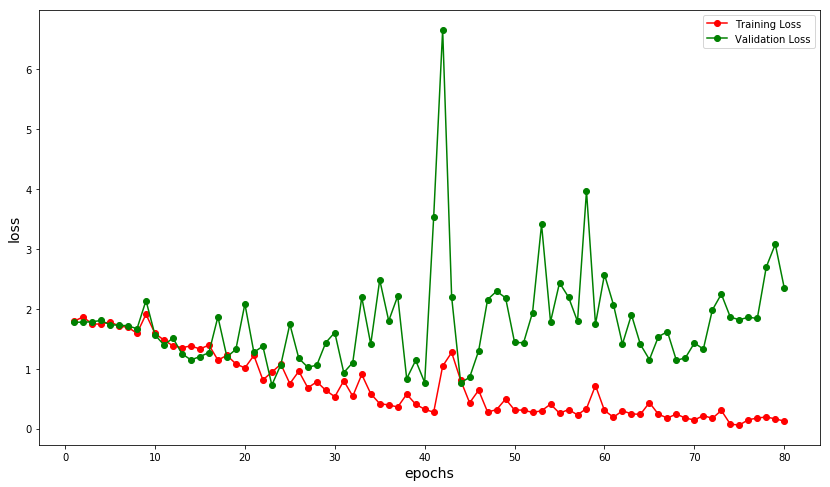

In [48]:
# Making the plot larger
plt.figure(figsize=(14, 8))

loss3_bg = history3_bg.history['loss']                          # Loss on the training data
val_loss3_bg = history3_bg.history['val_loss']                  # Loss on the validation data
epochs = range(1, 81)

plt.plot(epochs, loss3_bg, 'ro-', label='Training Loss')
plt.plot(epochs, val_loss3_bg, 'go-', label = 'Validation Loss')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

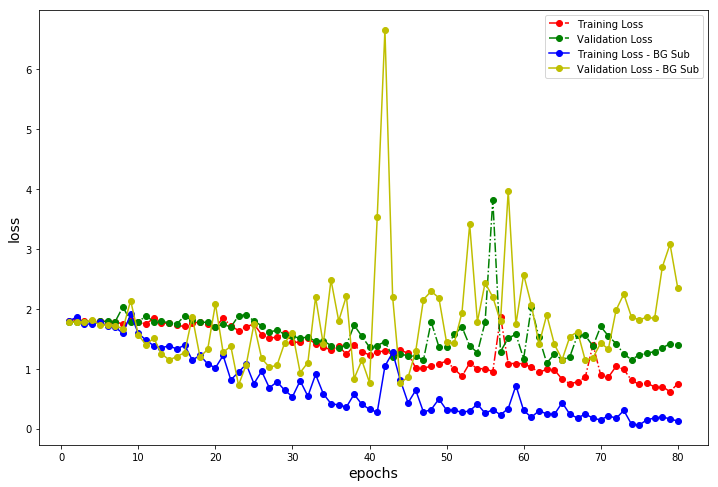

In [49]:
import matplotlib.pyplot as plt
import skvideo.io
%matplotlib inline


plt.figure(figsize=(12, 8))
plt.plot(epochs, loss3, 'ro-.', label='Training Loss')
plt.plot(epochs, val_loss3, 'go-.', label = 'Validation Loss')
plt.plot(epochs, loss3_bg, 'bo-', label='Training Loss - BG Sub')
plt.plot(epochs, val_loss3_bg, 'yo-', label = 'Validation Loss - BG Sub')
plt.xlabel('epochs', fontsize=14)
plt.ylabel('loss', fontsize=14)
plt.legend()

Normalized confusion matrix


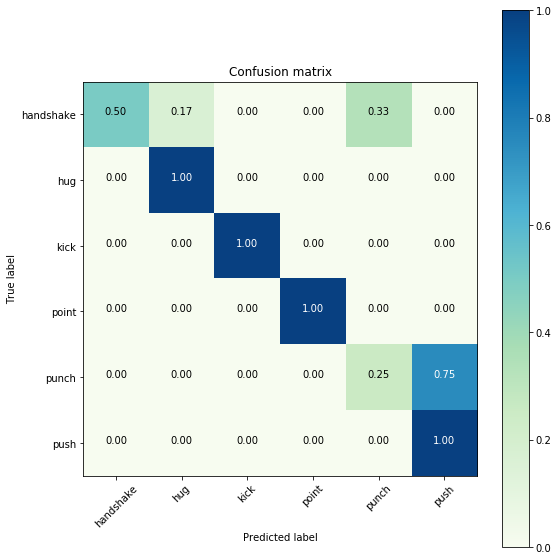

In [50]:
from sklearn.metrics import confusion_matrix
import itertools
y_predictions3_bg = model3_bg.predict_classes(X_test_bgsub);
y_pred3_bg=to_categorical(y_predictions3_bg, num_classes=6).argmax(axis=1);
y_test_cm = y_test.argmax(axis=1);
#print y_predictions3_bg[:50]
#print y_pred3_bg[:50]
model_cnf_matrix3_bg = confusion_matrix(y_test_cm,y_pred3_bg);
confusion_matrix_plot = plot_confusion_matrix(model_cnf_matrix3_bg, 
                                              classes=['handshake','hug','kick','point','punch','push'], 
                                              normalize=True)
